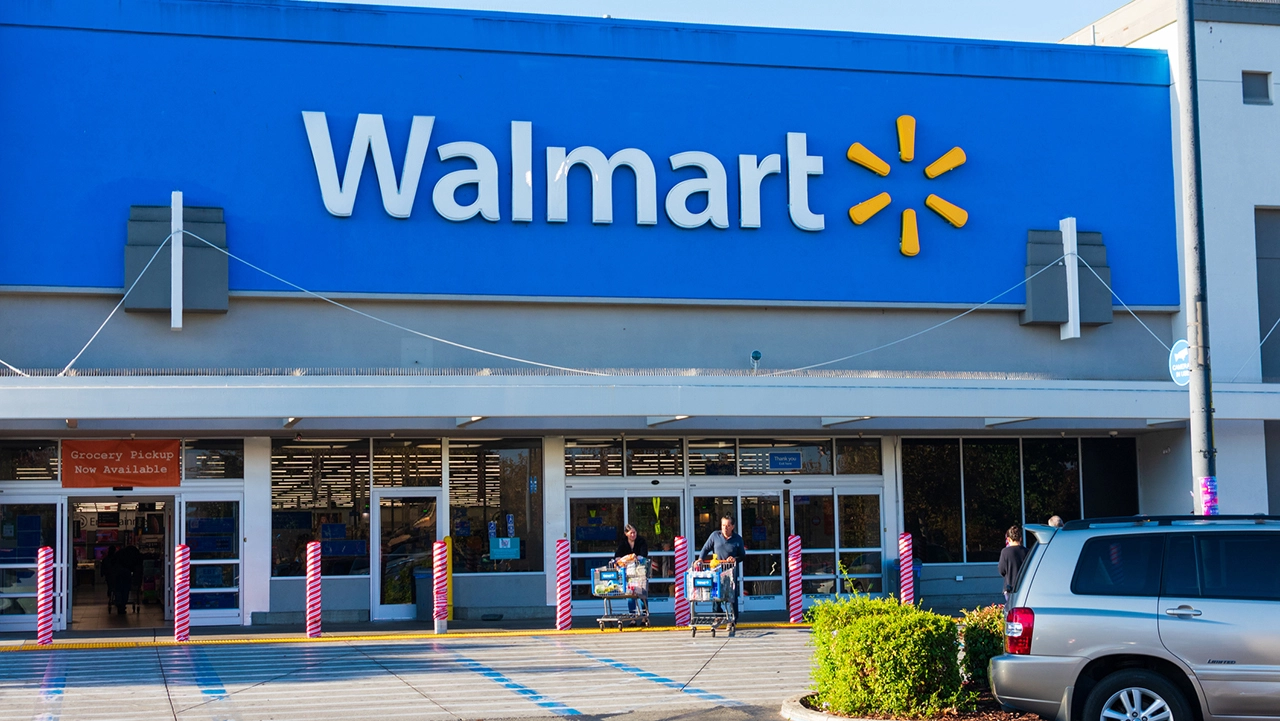

# Walmart EDA

## Loading the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
data=pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

In [3]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
data.shape

(6435, 8)

### Descriptive Statistics

In [6]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### Checking the null percentages

In [7]:
data.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

#### Extracting the date 

In [8]:
data["year"]=data.Date.dt.year
data["month"]=data.Date.dt.month
data["Day"]=data.Date.dt.day


In [9]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,3
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,19
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,26
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,4
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,2010,9,4


In [10]:
data.year.unique()

array([2010, 2011, 2012], dtype=int64)

#### Checking for duplicates values

In [11]:
data.duplicated().sum()

0

#### sorting the dataframe based on the date

In [12]:
data.sort_values(by='Date',inplace=True)
data.reset_index(drop=True,inplace=True)

## Univariate analysis


### Histogram

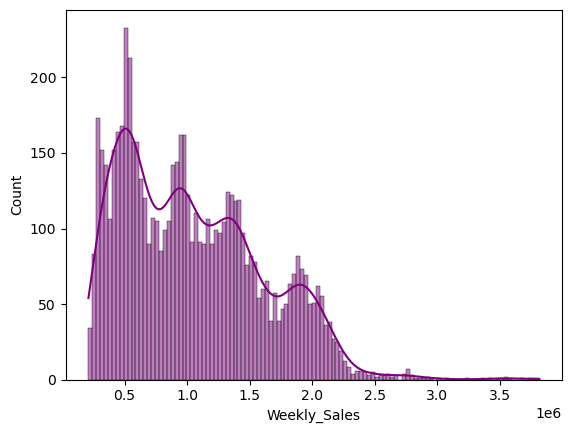

In [13]:
sns.histplot(data=data,x='Weekly_Sales',kde=True,bins=115,color='purple')
plt.show()

#### Here we can see the right skewed hitplot

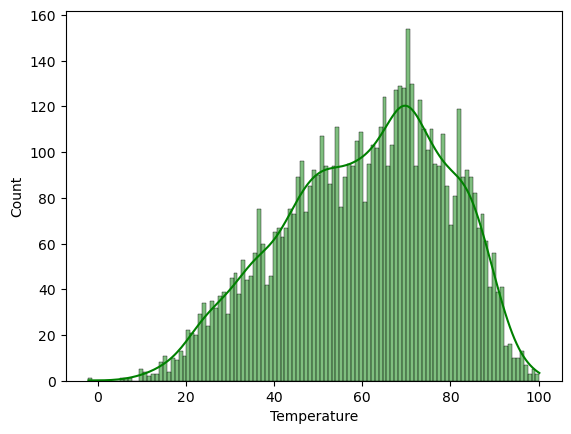

In [14]:
sns.histplot(data=data,x='Temperature',kde=True,bins=115,color='green')
plt.show()

#### Here the histogram of Temperature is left skewed.

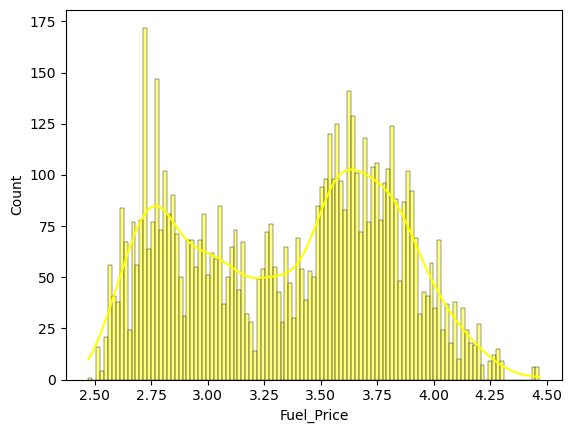

In [15]:
sns.histplot(data=data,x='Fuel_Price',kde=True,bins=115,color='yellow')
plt.show()

#### Here the histogram is bimoded.

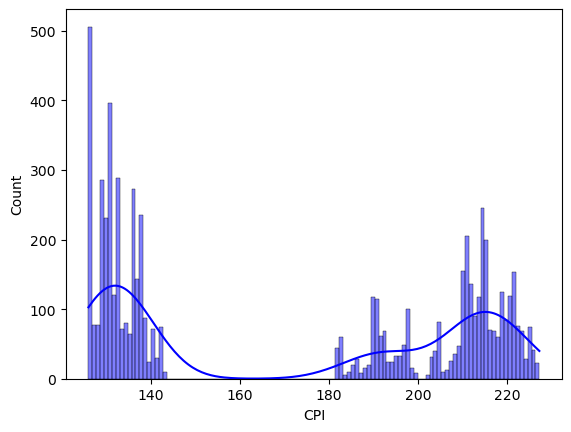

In [16]:
sns.histplot(data=data,x='CPI',kde=True,bins=115,color='blue')
plt.show()

#### Here the histogram is bimoded

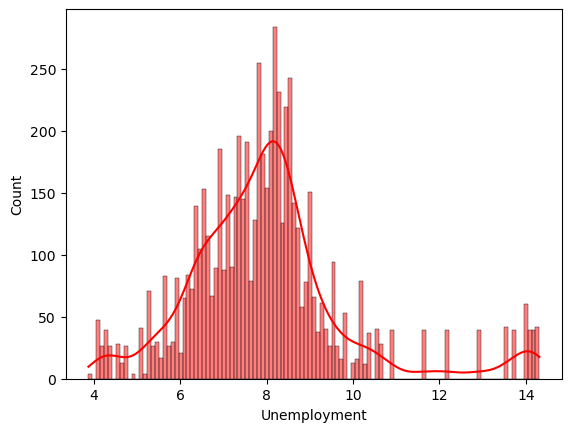

In [17]:
sns.histplot(data=data,x='Unemployment',kde=True,bins=115,color='red')
plt.show()

#### Here it is right skewed

### Box plot

In [18]:
column_list=['Weekly_Sales','Temperature','Fuel_Price','Unemployment','CPI']

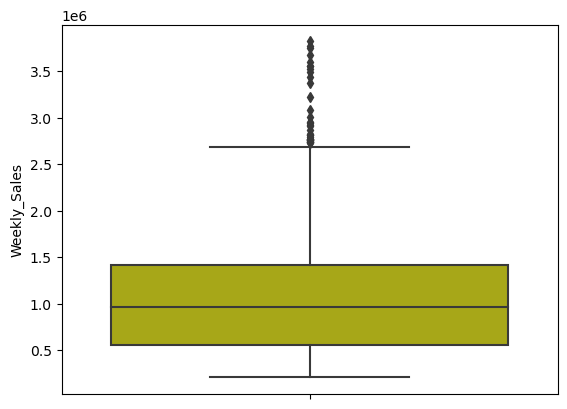

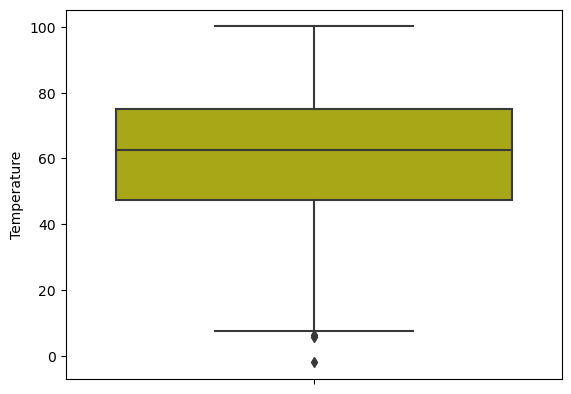

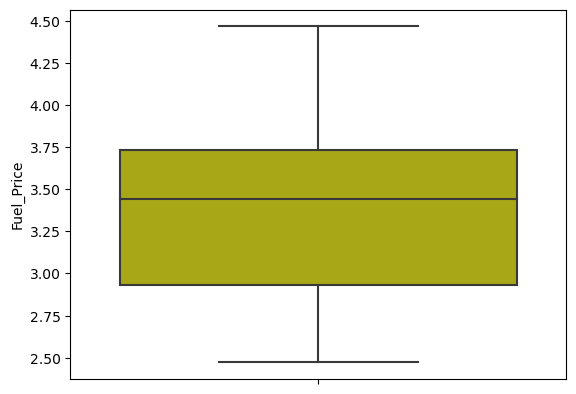

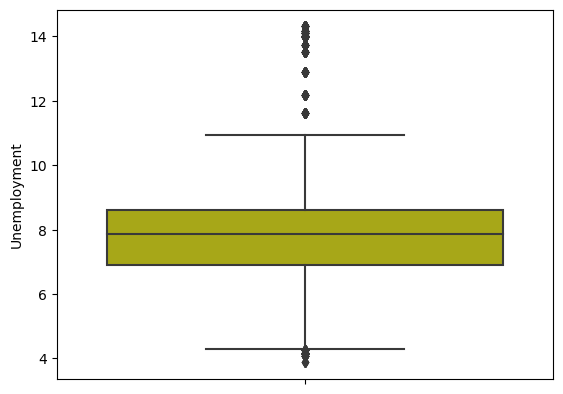

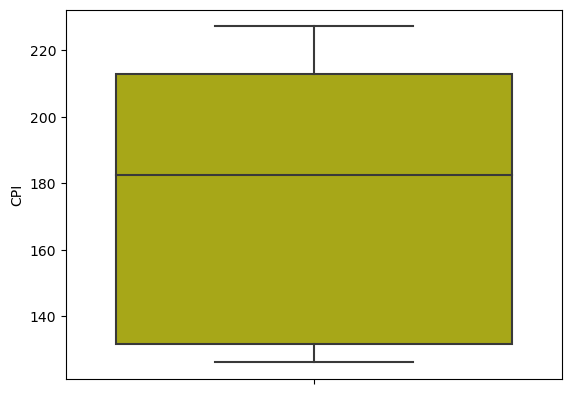

In [19]:
for i in column_list:
    sns.boxplot(y=data[i],data=data,color='y')
    plt.show()

#### Here the boxplot for  weekly_sales,temperature and unemployment  contain outliers

### Multivariate Analysis

### Count plot

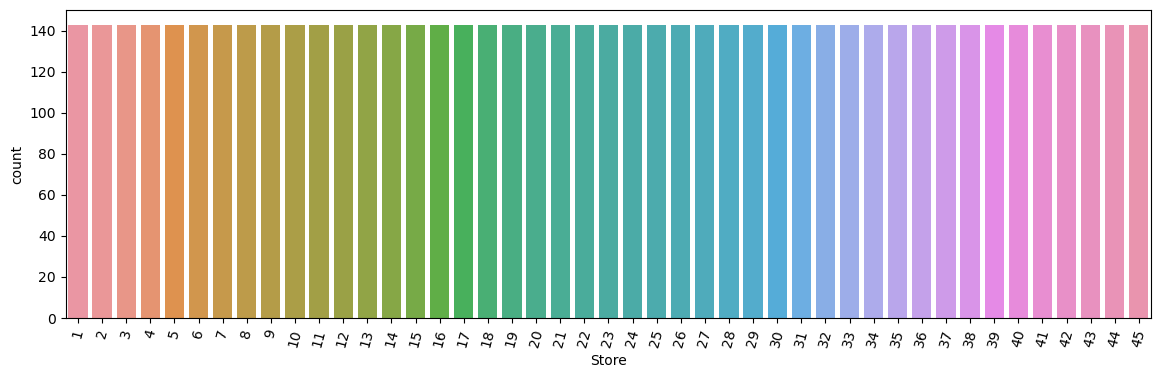

In [20]:
plt.figure(figsize=(14,4))
sns.countplot(x='Store',data=data)
plt.xticks(rotation=75)
plt.show()

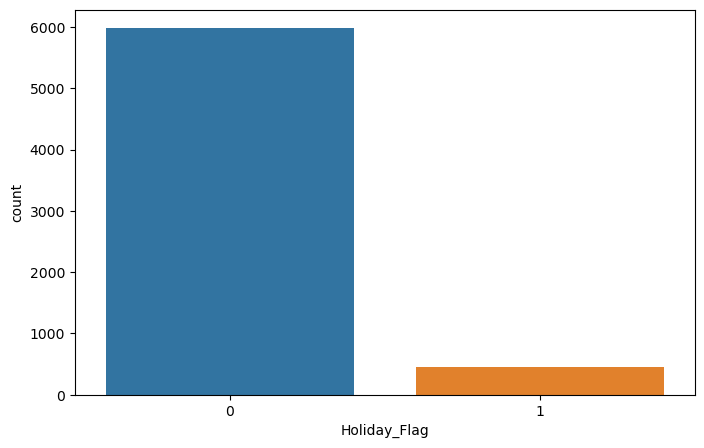

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Holiday_Flag')
plt.show()

### line chart

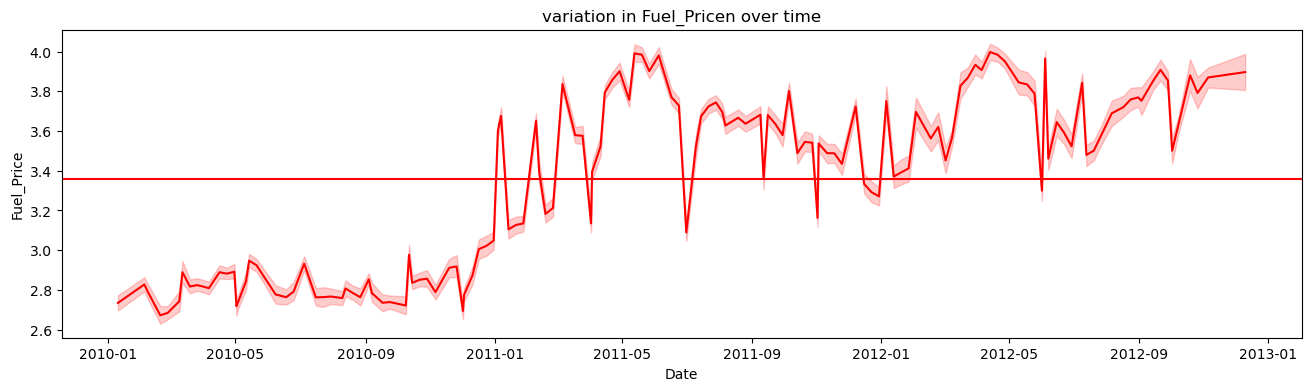

In [22]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Fuel_Price.mean(),color='r')
sns.lineplot(x='Date',y='Fuel_Price',data=data,color='red')
plt.title('variation in Fuel_Pricen over time')
plt.show()

##### Here the Fuel_Pricen is increasing from 2011 

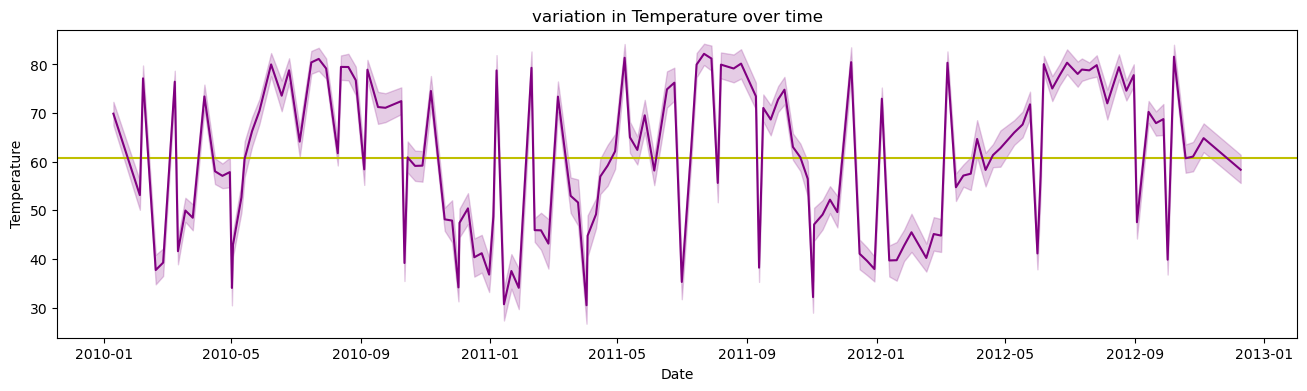

In [23]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Temperature.mean(),color='y')
sns.lineplot(x='Date',y='Temperature',data=data,color='purple')
plt.title('variation in Temperature over time')
plt.show()

##### Here the temperature is fluctuating drastically over the year

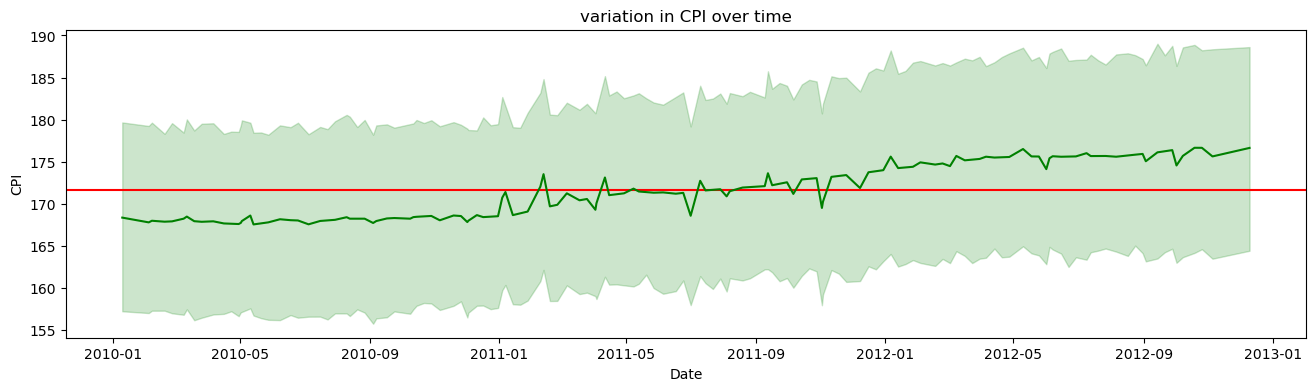

In [24]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.CPI.mean(),color='r')
sns.lineplot(x='Date',y='CPI',data=data,color='green')
plt.title('variation in CPI over time')
plt.show()

##### Here the CPI is  gradually increasing over the year

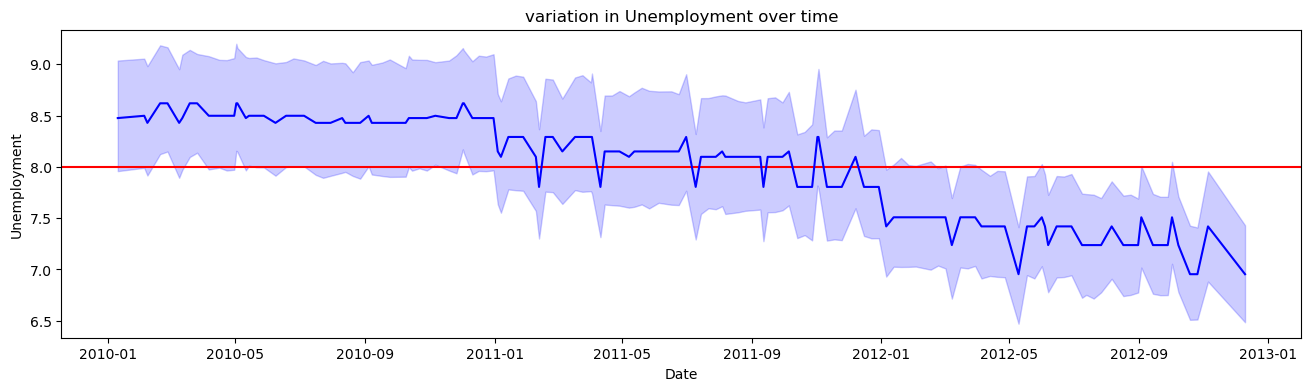

In [25]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Unemployment.mean(),color='r')
sns.lineplot(x='Date',y='Unemployment',data=data,color='blue')
plt.title('variation in Unemployment over time')
plt.show()

#### Here the unemployment is decreasing over the year

### Scatter plot

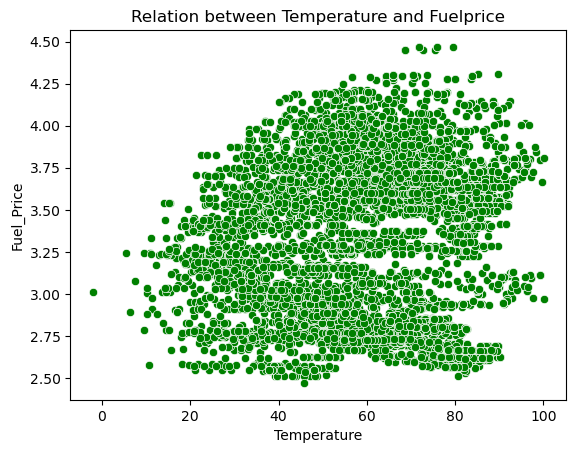

In [69]:
sns.scatterplot(data=data,x='Temperature',y='Fuel_Price',color='green')
plt.title('Relation between Temperature and Fuelprice')
plt.show()

#### Here there is no correlation between Temperature and Fuelprice

## Reg plot

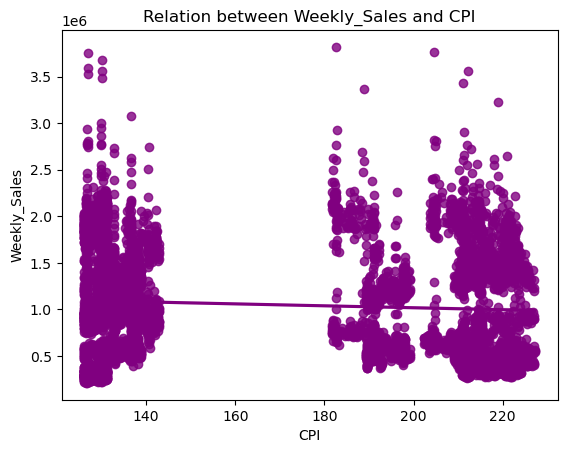

In [27]:
sns.regplot(data = data, x = 'CPI', y= 'Weekly_Sales',color='purple')
plt.title('Relation between Weekly_Sales and CPI')
plt.show()

#### There is no correlation between Weekly_Sales and CPI

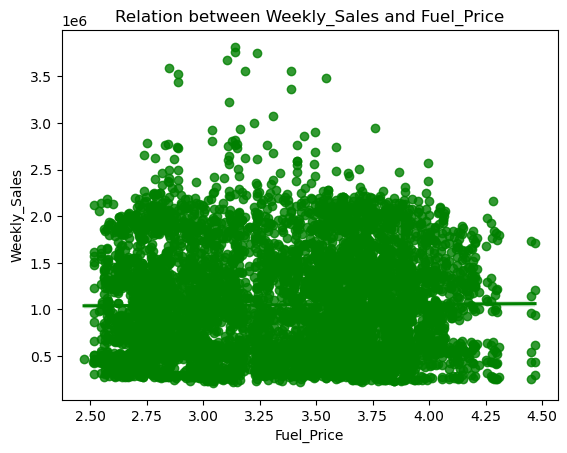

In [28]:
sns.regplot(data = data, x = 'Fuel_Price', y= 'Weekly_Sales',color='green')
plt.title('Relation between Weekly_Sales and Fuel_Price')
plt.show()

#### There is no correlation between Weekly_Sales and Fuel_Price

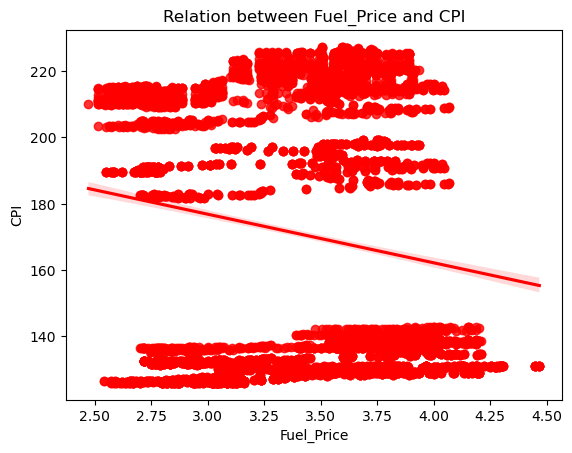

In [29]:
sns.regplot(data = data, x = 'Fuel_Price', y= 'CPI',color='red')
plt.title('Relation between Fuel_Price and CPI')
plt.show()

#### There is negative correlation between Fuel_Price and CPI

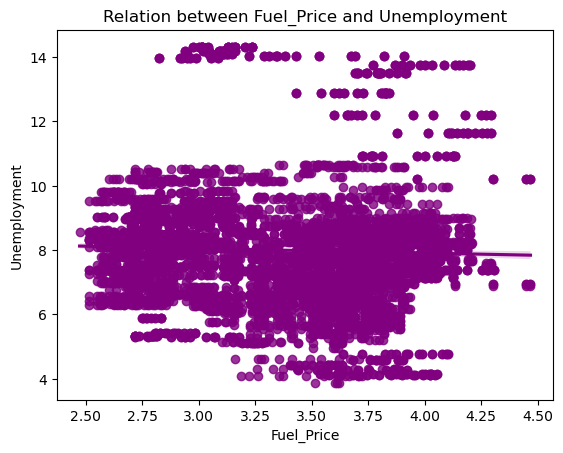

In [30]:
sns.regplot(data = data, x = 'Fuel_Price', y= 'Unemployment',color='purple')
plt.title('Relation between Fuel_Price and Unemployment')
plt.show()

#### There is no Relation between Fuel_Price and Unemployment

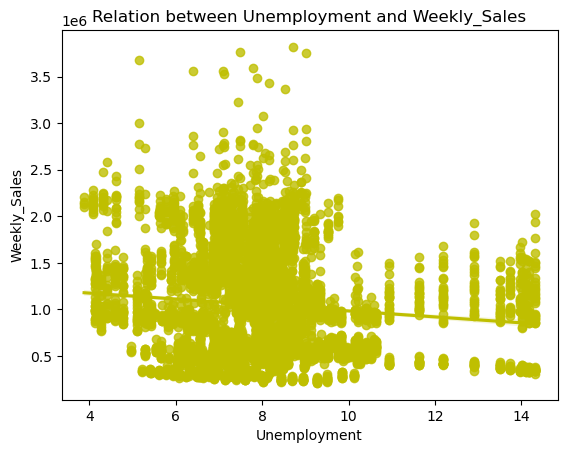

In [31]:
sns.regplot(data = data,x= 'Unemployment',y='Weekly_Sales',color='y')
plt.title('Relation between Unemployment and Weekly_Sales')
plt.show()

#### There is negative correlation between Unemployment and Weekly_Sales

### Joint plot

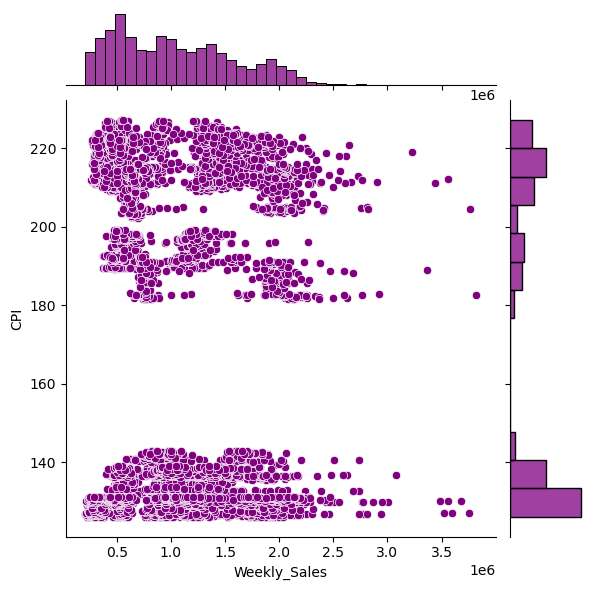

In [32]:
sns.jointplot(data=data, x='Weekly_Sales',y='CPI',color='purple')
plt.show()

## Heat map

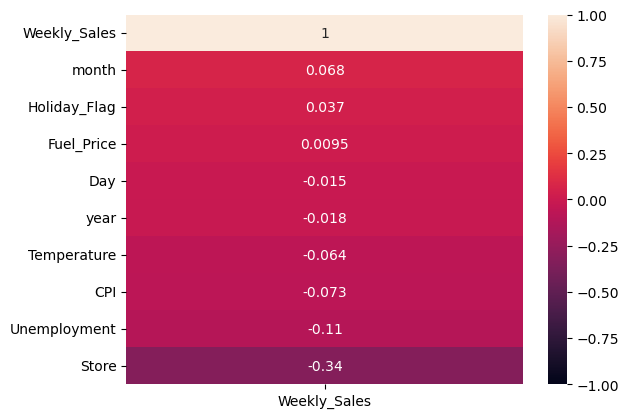

In [33]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False), vmax=1, vmin=-1, annot=True);

##### Here  weekly sales is not correlated  with day,year,temperature,CPI,Unemployment and store

## Horizontal bar plot

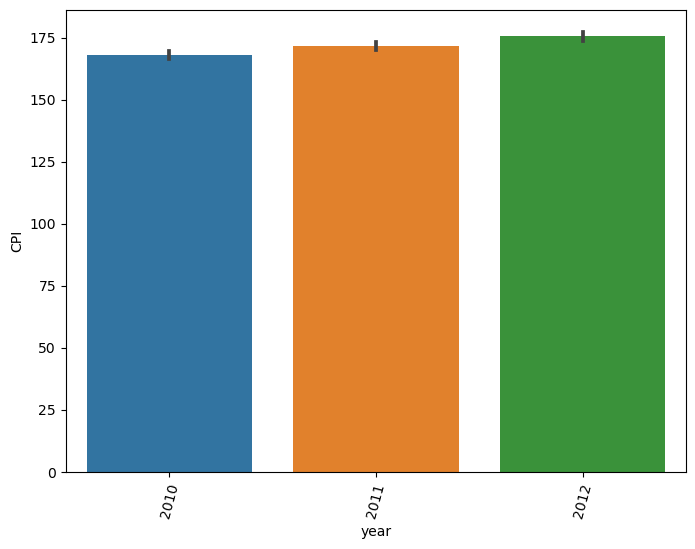

In [34]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 75)
sns.barplot(data=data, x='year', y='CPI')
plt.show()

#### Here CPI in 2012 is greater than both the year 2010 and 2011

### Vertical bar plot

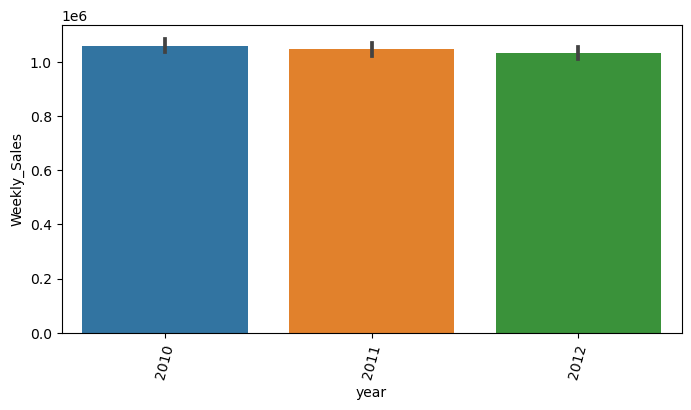

In [35]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 75)
sns.barplot(data=data, x='year', y='Weekly_Sales')
plt.show()

#### Here weekly sales in 2010 is greater than both 2011 and 2012

## pie chart

In [36]:
holiday_weekly_avg=data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()
holiday_weekly_avg

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

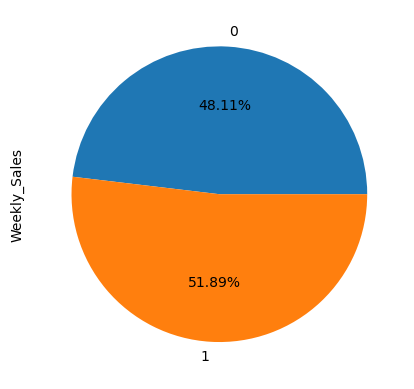

In [37]:
holiday_weekly_avg.plot.pie(autopct='%1.2f%%');

In [38]:
year_Unemployment=data.groupby(['year'])['Unemployment'].mean()
year_Unemployment

year
2010    8.492714
2011    8.082036
2012    7.347964
Name: Unemployment, dtype: float64

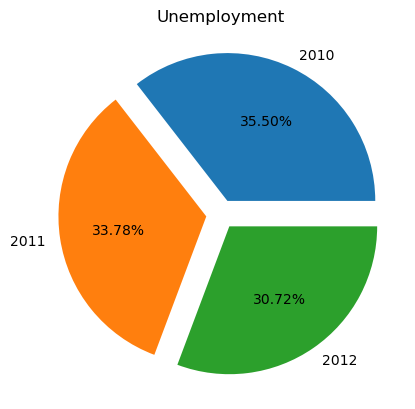

In [39]:
plt.pie(x=year_Unemployment, explode = [0.1,0.1,0.1], labels=['2010', '2011', '2012'], autopct='%1.2f%%')
plt.title("Unemployment")
plt.show()

### Lets add new columns from the date column

In [40]:
data["year"]=data.Date.dt.year
data["month"]=data.Date.dt.month
data["week_day"]=data.Date.dt.weekday


In [41]:
data['month']=data.month.replace({1:'january',
                                 2:'February',
                                 3:'March',
                                 4:'April',
                                 5:'May',
                                 6:'June',
                                 7:'July',
                                 8:'August',
                                 9:'September',
                                 10:'October',
                                 11:'November',
                                 12:'December'})
data['week_day']=data.week_day.replace({0:'sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [42]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day,week_day
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,january,10,Saturday
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,january,10,Saturday
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,january,10,Saturday
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,january,10,Saturday
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,january,10,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,2012,December,10,sunday
6431,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,2012,December,10,sunday
6432,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,December,10,sunday
6433,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,2012,December,10,sunday


In [43]:
profit_avg=data.groupby(['week_day'])['Weekly_Sales'].mean()
profit_avg

week_day
Friday       1.046277e+06
Monday       1.070389e+06
Saturday     1.053356e+06
Thursday     1.038485e+06
Tuesday      1.030142e+06
Wednesday    1.059165e+06
sunday       1.088916e+06
Name: Weekly_Sales, dtype: float64

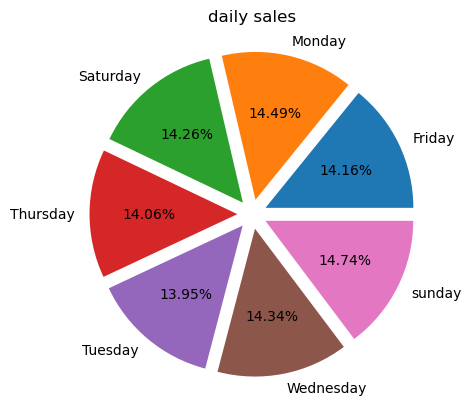

In [44]:
plt.pie(x=profit_avg,explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1],labels=profit_avg.index,autopct='%1.2f%%')
plt.title('daily sales')
plt.show()

### Bar plot

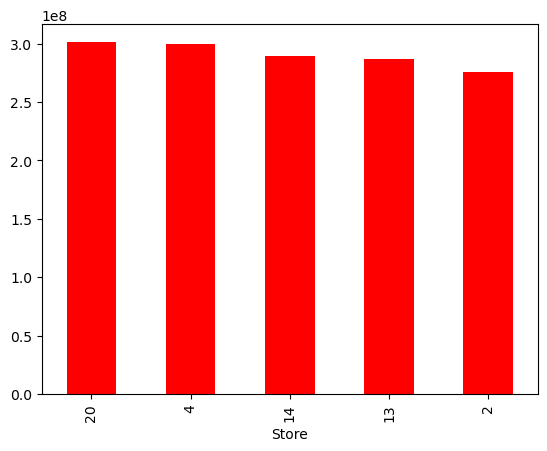

In [45]:
store_weekly_sales=data.groupby(['Store'])['Weekly_Sales'].sum()
store_weekly_sales.nlargest(5).plot.bar(color='red');

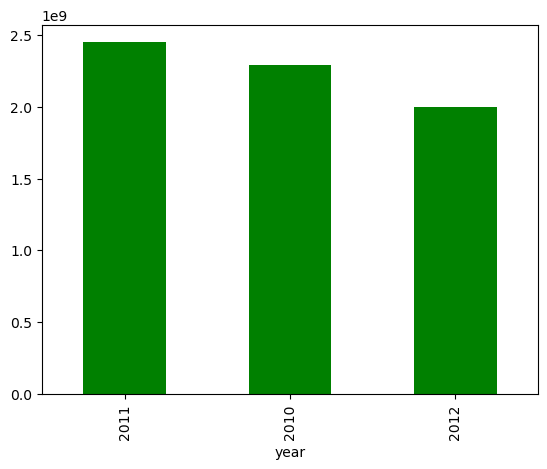

In [46]:
year_weekly_sales=data.groupby(['year'])['Weekly_Sales'].sum()
year_weekly_sales.nlargest(6).plot.bar(color='green');

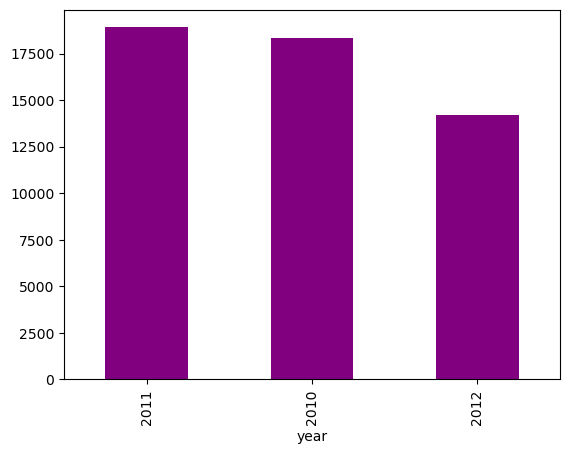

In [47]:
year_Unemployment=data.groupby(['year'])['Unemployment'].sum()
year_Unemployment.nlargest(6).plot.bar(color='purple');

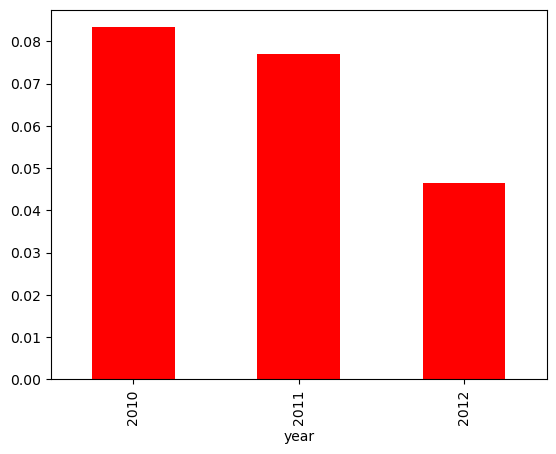

In [48]:
year_holyday=data.groupby(['year'])['Holiday_Flag'].mean()
year_holyday.nlargest(6).plot.bar(color='red');

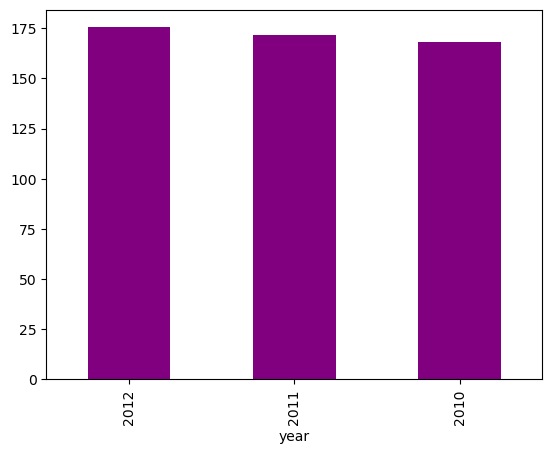

In [49]:
year_CPI=data.groupby(['year'])['CPI'].mean()
year_CPI.nlargest(6).plot.bar(color='purple');

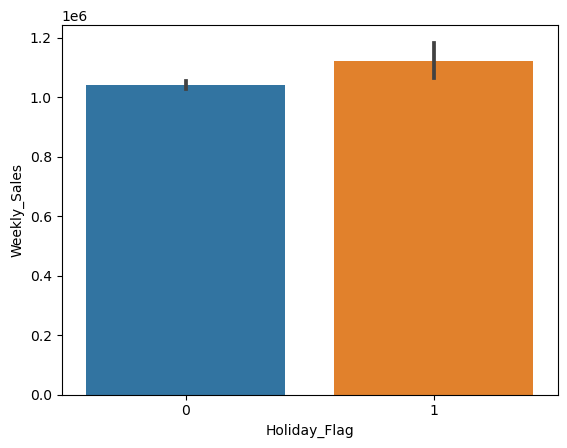

In [50]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=data)
plt.show()

### year wise plot

In [51]:
year_2010=data[data.year==2010]
year_2011=data[data.year==2011]
year_2012=data[data.year==2012]


In [52]:
year_2010.drop(columns='year',inplace=True)
year_2011.drop(columns='year',inplace=True)
year_2012.drop(columns='year',inplace=True)

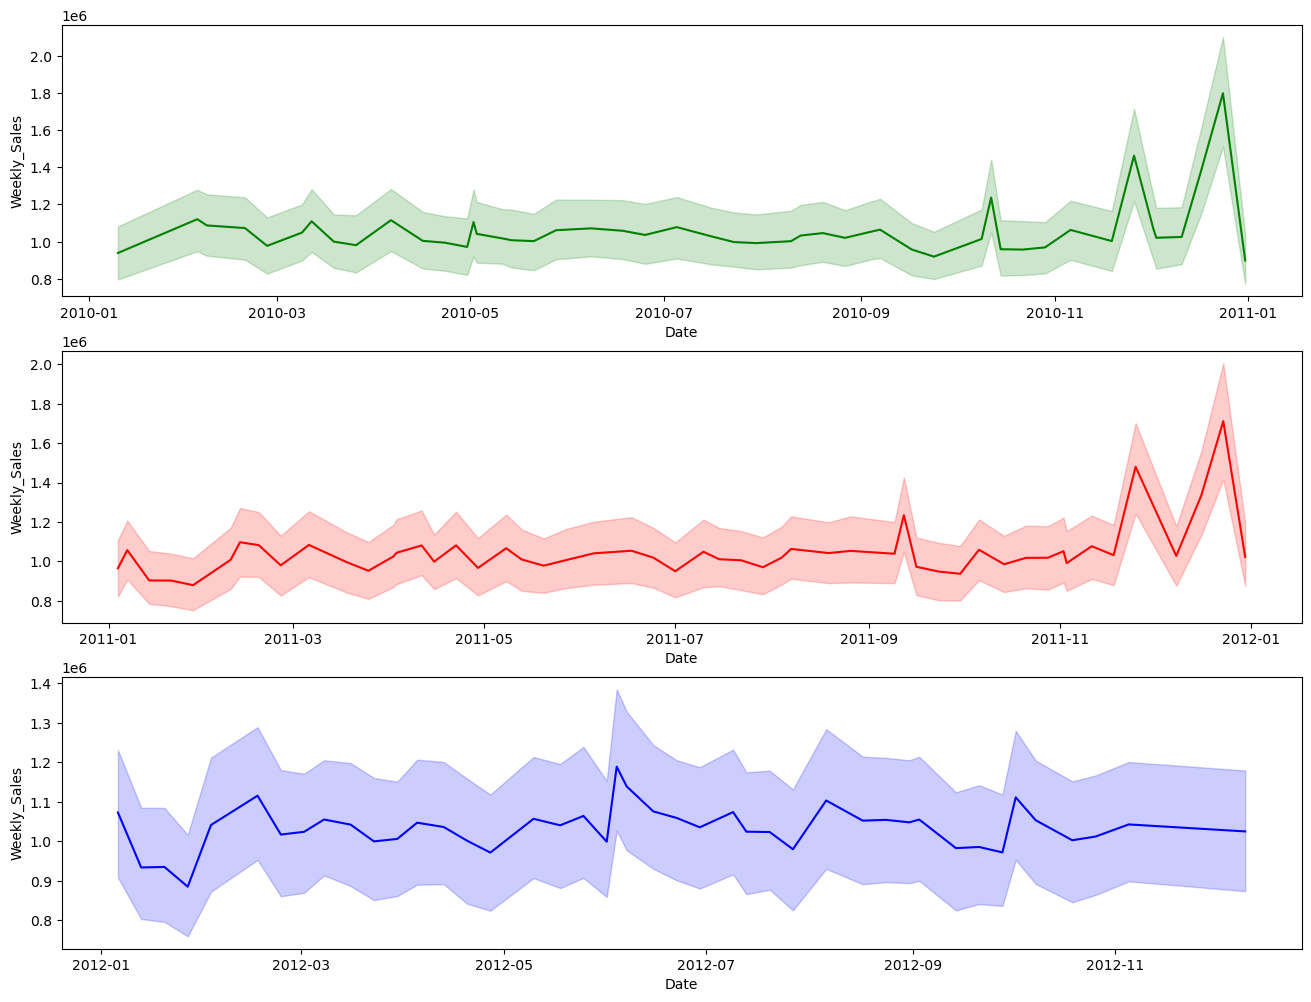

In [53]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2010,color='g')

plt.subplot(3,1,2)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2011,color='r')

plt.subplot(3,1,3)
sns.lineplot(x='Date',y='Weekly_Sales',data=year_2012,color='b')
plt.show()

### yearly sales from each stores

In [54]:
year_store=data.groupby(['Store','year'])['Weekly_Sales'].sum()

In [55]:
year_store=year_store.reset_index()

In [56]:
year_store

,Store,year,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42
...,...,...,...
130,44,2011,15498194.67
131,44,2012,14187373.72
132,45,2010,38536343.37
133,45,2011,41135367.88


In [57]:
year_store.nlargest(5,'Weekly_Sales')

,Store,year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08


### Top stores in each year

In [58]:
year_sales_store_2010=year_store[year_store.year==2010] 
year_sales_store_2011=year_store[year_store.year==2011] 
year_sales_store_2012=year_store[year_store.year==2012] 

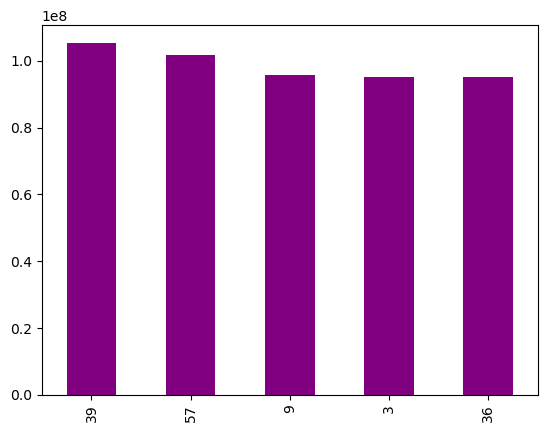

In [59]:
year_sales_store_2010.Weekly_Sales.nlargest(5).plot.bar(color='purple');

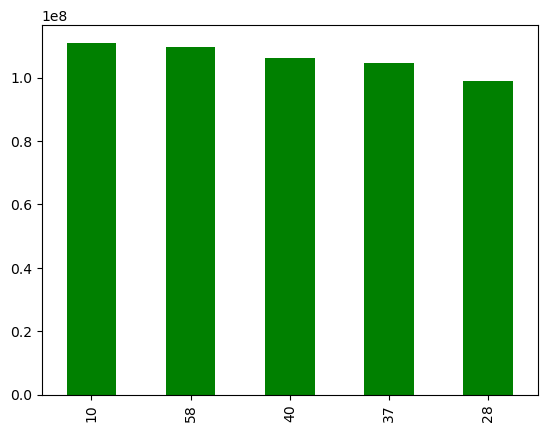

In [60]:
year_sales_store_2011.Weekly_Sales.nlargest(5).plot.bar(color='g');

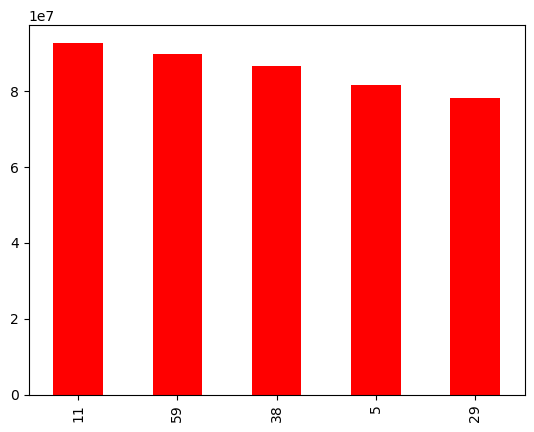

In [61]:
year_sales_store_2012.Weekly_Sales.nlargest(5).plot.bar(color='r');

### temperature

In [62]:
data['celsius']=[(Temp-32)*(5/9) for Temp in data.Temperature]

### create a new column called Heat

In [63]:
data['heat']=pd.cut(x=data.celsius,bins=[-20,10,35],labels=['cold','warm'])

In [64]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day,week_day,celsius,heat
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,january,10,Saturday,21.722222,warm
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,january,10,Saturday,15.383333,warm
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,january,10,Saturday,30.005556,warm
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,january,10,Saturday,33.027778,warm
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,january,10,Saturday,23.700000,warm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,2012,December,10,sunday,4.100000,cold
6431,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,2012,December,10,sunday,6.255556,cold
6432,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,December,10,sunday,24.461111,warm
6433,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,2012,December,10,sunday,6.522222,cold


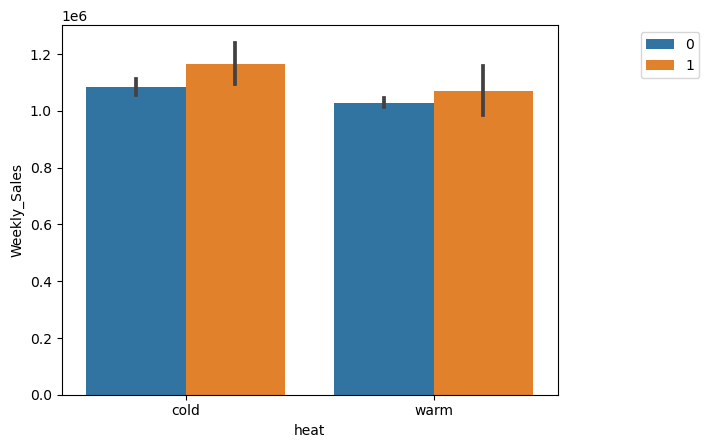

In [65]:
sns.barplot(x='heat',y='Weekly_Sales',hue='Holiday_Flag',data=data)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

### plotting from pivot tables

In [66]:
monthly_sales=pd.pivot_table(data=data,values='Weekly_Sales',index='month',columns='year')

In [67]:
monthly_sales

year,2010,2011,2012
month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.198413e+06,1.274311e+06,1.025078e+06
February,1.064372e+06,1.042273e+06,1.057997e+06
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06
November,1.176097e+06,1.126535e+06,1.042797e+06


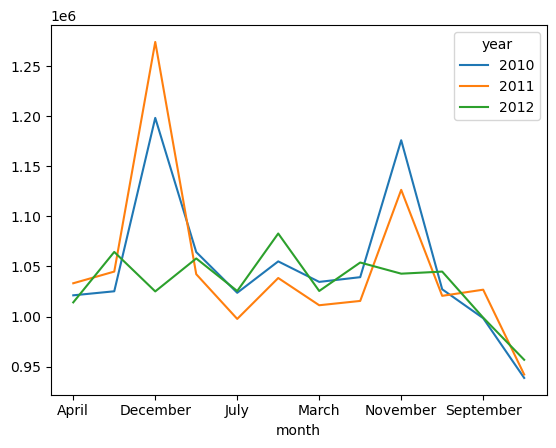

In [68]:
monthly_sales.plot();